## Transform

In [260]:
from fbprophet import Prophet

In [261]:
dfBngPriceMod.head()

,date,priceMod,priceModShift,priceModLog
date,,,,
2004-01-01,2004-01-01,991,NaN,6.898715
2004-02-01,2004-02-01,793,991.0,6.675823
2004-03-01,2004-03-01,556,793.0,6.320768
2004-04-01,2004-04-01,465,556.0,6.142037
2004-05-01,2004-05-01,455,465.0,6.120297


In [262]:
dfBngPriceMod['priceModLog'] = np.log(dfBngPriceMod.priceMod)

In [263]:
dfBngPriceMod.head()

,date,priceMod,priceModShift,priceModLog
date,,,,
2004-01-01,2004-01-01,991,NaN,6.898715
2004-02-01,2004-02-01,793,991.0,6.675823
2004-03-01,2004-03-01,556,793.0,6.320768
2004-04-01,2004-04-01,465,556.0,6.142037
2004-05-01,2004-05-01,455,465.0,6.120297


In [264]:
dfBngPriceLog = dfBngPriceMod.drop(labels=['priceModShift', 'priceMod'], axis=1)

In [265]:
dfBngPriceLog.head()

,date,priceModLog
date,,
2004-01-01,2004-01-01,6.898715
2004-02-01,2004-02-01,6.675823
2004-03-01,2004-03-01,6.320768
2004-04-01,2004-04-01,6.142037
2004-05-01,2004-05-01,6.120297


In [266]:
dfBngPriceLog.columns = ['ds', 'y']

In [267]:
dfBngPriceLog.head()

,ds,y
date,,
2004-01-01,2004-01-01,6.898715
2004-02-01,2004-02-01,6.675823
2004-03-01,2004-03-01,6.320768
2004-04-01,2004-04-01,6.142037
2004-05-01,2004-05-01,6.120297


In [268]:
m = Prophet()

In [269]:
m.fit(dfBngPriceLog)

In [270]:
future = m.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
177,2018-09-30
178,2018-10-31
179,2018-11-30
180,2018-12-31
181,2019-01-31


In [271]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
177,2018-09-30,7.216689,6.777162,7.638491
178,2018-10-31,6.949697,6.532544,7.387047
179,2018-11-30,6.951674,6.502240,7.426115
180,2018-12-31,7.175524,6.703686,7.640490
181,2019-01-31,6.811306,6.355866,7.307589


In [272]:
#dfBngPriceLog.reset_index(inplace=True)

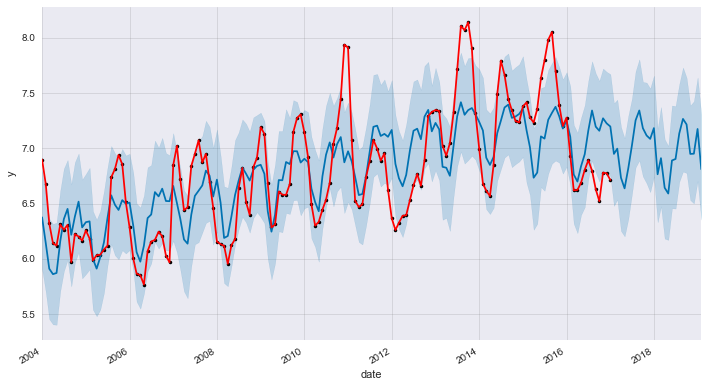

In [273]:
m.plot(forecast)
dfBngPriceLog.y.plot(kind='line', c='r')

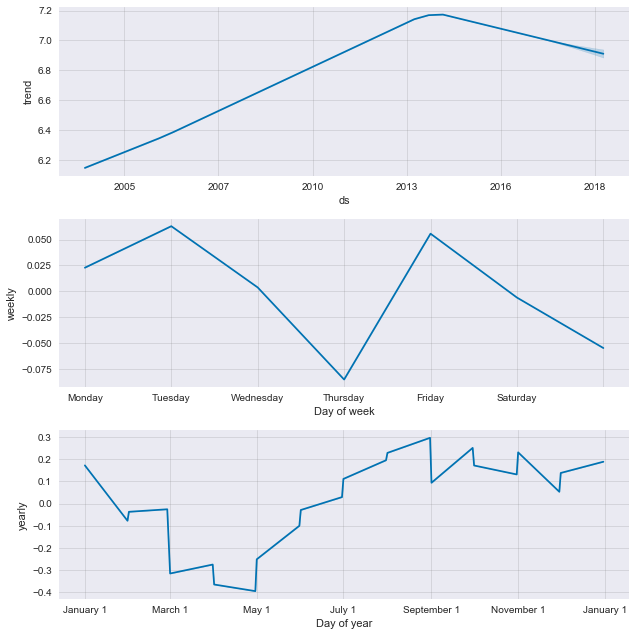

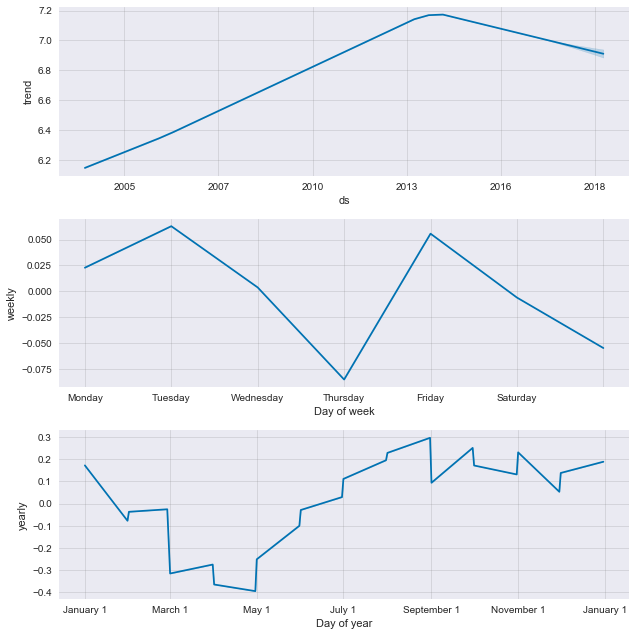

In [274]:
m.plot_components(forecast)